<h1><center>STAT/CSE 416 Section 7: Non-Negative Matrix Factorization</center></h1>
<center><b>Section:</b></center>
<center><b>Instructor:</b>Emilija Perković</center>
<center><b>TA:</b></center>
<center><b>Date:</b>March 2, 2023</center>

<center><b>Author</b>: Octavian-Vlad Murad</center>

# Non-Negative Matrix Factorization

Non-Negative Matrix Factorization attempts to approximate a matrix $\mathbf{X} \in \mathbb{R}^{m \times n}$ by two low-rank(thin) matrices $\mathbf{W} \in \mathbb{R}^{m \times k}$ and  $\mathbf{H} \in \mathbb{R}^{k \times n}$ such that all the entries of $\mathbf{W}$ and $\mathbf{H}$ are non-negative. $k$ is referred to as the **number of components** or **embedding size**. The two matrices which decompose $\mathbf{X}$ are obtained by minimizing the objective:

$$\arg\min_{\mathbf{W}, \mathbf{H}} \frac{1}{2}\|\mathbf{X} - \mathbf{W}\mathbf{H}\|_F^2 = \frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^n (\mathbf{X}_{ij} - \mathbf{W}_{i:}\mathbf{H}_{:j})^2 $$

Suppose the matrix $\mathbf{X}$ is a matrix of users by movies and each entry $\mathbf{X}_{ij}$ represents the grade assigned by user $i$ to movie $j$. Furthermore, suppose that we pick $k$, the size of the embedding, to be much smaller than $n$ and $m$, the number of users and movies. After we compute the decomposition, each row $\mathbf{W}_{i:}$ can be used as a low dimensional embedding for user $i$, while each column $\mathbf{H}_{:j}$ can be used as low dimensional embedding for movie $j$, giving us a much more compact representation of $\mathbf{X}$. Furthermore, we can look at each coordinate of the embedding as representing some hidden **factor** or **topic**(for example, the genres of movies in our example). 

The embeddings thus obtained can be used in many ways. For example:
* $\mathbf{W}_{i:} \cdot \mathbf{W}_{j:}$ would give us the likeness of two users.
* $\mathbf{H}_{i:} \cdot \mathbf{H}_{j:}$ would give us the likeness of two movies.
* $\mathbf{W}_{i:} \cdot \mathbf{H}_{j:}$ what do we predict user i to rate movie j.

<div>
<img src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f9/NMF.png/400px-NMF.png" width="400"/>
</div><sup><sub>Image Source: Wikipedia (https://en.wikipedia.org/wiki/Non-negative_matrix_factorization)</sup></sub>

In [1]:
import numpy as np
import pandas as pd
import string

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# read in and process data which consists of the Amazon food reviews used for homework 3.
products = pd.read_csv('food_products.csv')
def remove_punctuation(text):
    if type(text) is str:
        return text.translate(str.maketrans('', '', string.punctuation))
    else:
        return ''
products['review_clean'] = products['review'].apply(remove_punctuation)


# compute tf-idf features
vectorizer = TfidfVectorizer(max_df=0.95, min_df=10, stop_words='english')
count_matrix = vectorizer.fit_transform(products['review_clean'])
product_data = pd.DataFrame(count_matrix.toarray(), index=products.index,
                            columns=vectorizer.get_feature_names_out())

In [7]:
# compute the Non-Neg Mat. Factorization with 64 components
model = NMF(n_components=64, init='random', random_state=0)
review_embeddings = model.fit_transform(count_matrix) # returns W
word_embeddings = model.components_.T # returns H which we transpose

/home/ovmurad/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [8]:
print(word_embeddings.shape)
print(word_embeddings)

(830, 64)
[[0.00329395 0.         0.         ... 0.0030461  0.04815348 0.        ]
 [0.         0.         0.         ... 0.         0.         0.056239  ]
 [0.         0.         0.         ... 0.00820111 0.01281144 0.02627753]
 ...
 [0.         0.         0.03374036 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [4]:
print(review_embeddings.shape)
print(review_embeddings)

(1250, 64)
[[0.19061647 0.25242203 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00666978 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00793666 0.00150549 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.17579547 0.         0.        ]
 [0.01138986 0.02343361 0.         ... 0.         0.         0.        ]]


20


/home/ovmurad/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


60


/home/ovmurad/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


100
140
180


/home/ovmurad/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


220
260


/home/ovmurad/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


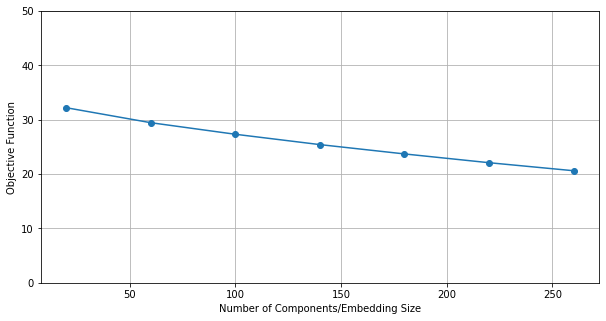

In [5]:
import matplotlib.pyplot as plt

# plot the reconstruction error as function of the number of factors
# going to take a bit to compute
num_components = np.arange(20, 261, 40)
rec_errors = []
for nc in num_components:
    print(nc)
    model = NMF(n_components=nc, init='random', random_state=0)
    model.fit_transform(count_matrix)
    rec_errors.append(model.reconstruction_err_)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(num_components, rec_errors, marker='o')
ax.set_ylim(0, 50)
ax.set_xlabel("Number of Components/Embedding Size")
ax.set_ylabel("Objective Function")
ax.grid(which='both')

In [14]:
from sklearn.metrics import pairwise_distances

# print the closest words to some query words

def get_top_k_closest(data, word, k):
    word_index = list(product_data.columns).index(word)
    dist = pairwise_distances(data, data[word_index].reshape(1, -1), metric='cosine')
    dist_args_sorted = np.argsort(dist.flatten())

    print("Closest " + str(k) +" words to " + word)
    print([product_data.columns[dist_args_sorted[i]] for i in range(k)])

get_top_k_closest(word_embeddings, "pasta", 10)
get_top_k_closest(word_embeddings, "sweet", 10)
get_top_k_closest(word_embeddings, "chicken", 10)
get_top_k_closest(word_embeddings, "spice", 10)

Closest 10 words to pasta
['pasta', 'macaroni', 'mac', 'cheese', 'kraft', 'veggie', 'servings', 'annies', 'prepared', 'veggies']
Closest 10 words to sweet
['sweet', 'overly', 'sugary', 'available', 'stevia', 'description', 'beverage', 'came', 'overpowering', 'candy']
Closest 10 words to chicken
['chicken', 'meat', 'broth', 'beef', 'couple', 'chili', 'vegetables', 'slim', 'adding', 'soft']
Closest 10 words to spice
['spice', 'lemon', 'cinnamon', 'gum', 'apple', 'juice', 'chai', 'licorice', 'hardly', 'unpleasant']
